# Project: Establishing Essential Workflows on Financial Data

## Brief Project Description

In this project, we import the US stocks dataset (us_stocks.csv) and select the Adjusted Close (Adj Close) for all six stocks from December 31, 2015 (inclusive) until December 31, 2018 (inclusive). Next, we save the DataFrame in the variable stocks and work through the following tasks with this DataFrame:

- __Visualizing__ the Adjusted Close of the six stocks __over time__!
- __Visualiing__ the __normalizing__ Adjusted Close of the six stocks __over time__, each starting at a __Base Value of 100__!
- Calculating __monthly returns__ for all six stocks and create a new __returns__ DataFrame!
- Calculating the __annualized mean return__ and the __annualized standard deviation__ of returns for all six stocks!
- __Visualizing risk/return__ of all six stocks in a (total) risk / return framework. (annualized std on the x-axis, annualized mean returns on the y-axis). Identifying the __best performing__ stock and the __worst performing__ stock (in terms of __risk / return__) <br>
- __Visualizing__ the __correlation matrix__ of monthly returns with a __Seaborn Heatmap__. Show stocks-pair with the __highest (positive) correlation__ of monthly returns.

__Ticker Symbols__:
- AXP : American Express
- FB : Facebook
- INTC : Intel
- MCD : McDonalds
- PG : Procter & Gamble
- WMT: Walmart

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

import warnings
warnings.filterwarnings("ignore")

## Data Import and First Inspection

In [ ]:
# Get the data files from google drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Import daily stock price data (us_stocks.csv) and convert it into a pandas dataframe
df = pd.read_csv('/content/drive/MyDrive/us_stocks.csv', header=[0,1], index_col=0, parse_dates=[0])

In [ ]:
df.head()

Open                                                  \
                  AXP  FB       INTC        MCD         PG        WMT   
Date                                                                    
2009-12-31  40.900002 NaN  20.600000  62.970001  61.520000  54.250000   
2010-01-04  40.810001 NaN  20.790001  62.630001  61.110001  53.740002   
2010-01-05  40.830002 NaN  20.940001  62.660000  61.130001  54.090000   
2010-01-06  41.230000 NaN  20.809999  62.200001  60.939999  53.500000   
2010-01-07  41.259998 NaN  20.730000  61.250000  60.580002  53.720001   

                 High                        ...  Adj Close             \
                  AXP  FB       INTC    MCD  ...       INTC        MCD   
Date                                         ...                         
2009-12-31  41.080002 NaN  20.719999  63.07  ...  15.252899  47.055138   
2010-01-04  41.099998 NaN  21.030001  63.07  ...  15.611791  47.311375   
2010-01-05  41.230000 NaN  20.990000  62.75  ...  15.604316  46.949627   
2010-01-06  41.669998 NaN  20.930000  62.41  ...  15.551979  46.309067   
2010-01-07  42.240002 NaN  20.760000  62.34  ...  15.402434  46.648193   

                                    Volume                                   \
                   PG        WMT       AXP  FB      INTC       MCD       PG   
Date                                                                          
2009-12-31  45.146072  42.548668   4030500 NaN  26429200   4495300  5942200   
2010-01-04  45.510941  43.169579   6894300 NaN  47800900   5839300  9190800   
2010-01-05  45.525822  42.739723  10641200 NaN  52357700   7099000  8649400   
2010-01-06  45.309883  42.644184   8399400 NaN  40037400  10551300  9908400   
2010-01-07  45.064171  42.668079   8981700 NaN  54041500   7517700  8972800   

                      
                 WMT  
Date                  
2009-12-31   9764800  
2010-01-04  20753100  
2010-01-05  15648400  
2010-01-06  12517200  
2010-01-07  10662700  

[5 rows x 36 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2264 entries, 2009-12-31 to 2018-12-28
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Open, AXP)        2264 non-null   float64
 1   (Open, FB)         1664 non-null   float64
 2   (Open, INTC)       2264 non-null   float64
 3   (Open, MCD)        2264 non-null   float64
 4   (Open, PG)         2264 non-null   float64
 5   (Open, WMT)        2264 non-null   float64
 6   (High, AXP)        2264 non-null   float64
 7   (High, FB)         1664 non-null   float64
 8   (High, INTC)       2264 non-null   float64
 9   (High, MCD)        2264 non-null   float64
 10  (High, PG)         2264 non-null   float64
 11  (High, WMT)        2264 non-null   float64
 12  (Low, AXP)         2264 non-null   float64
 13  (Low, FB)          1664 non-null   float64
 14  (Low, INTC)        2264 non-null   float64
 15  (Low, MCD)         2264 non-null   float64
 16  (Low, 

In [ ]:
# Select the adjusted close price column for a further analysis
adj_close = df.loc[:,'Adj Close'].copy()
adj_close.head()

,AXP,FB,INTC,MCD,PG,WMT
Date,,,,,,
2009-12-31,35.271194,NaN,15.252899,47.055138,45.146072,42.548668
2010-01-04,35.619373,NaN,15.611791,47.311375,45.510941,43.169579
2010-01-05,35.541039,NaN,15.604316,46.949627,45.525822,42.739723
2010-01-06,36.115540,NaN,15.551979,46.309067,45.309883,42.644184
2010-01-07,36.701283,NaN,15.402434,46.648193,45.064171,42.668079


In [ ]:
# Confine the time period from 31-12-2015 (incl.) until 31-12-2018
adj_close = adj_close.loc['31-12-2015' :'31-12-2018'].copy()
adj_close.head()

,AXP,FB,INTC,MCD,PG,WMT
Date,,,,,,
2015-12-31,65.910294,104.660004,31.437597,108.968636,71.450706,56.722713
2016-01-04,64.052849,102.220001,31.017828,108.452126,70.514938,56.870766
2016-01-05,63.067310,102.730003,30.871820,109.946350,70.739891,58.221748
2016-01-06,61.315948,102.970001,30.187403,109.208458,70.056053,58.804699
2016-01-07,60.763893,97.919998,29.055828,106.681190,69.444221,60.174198


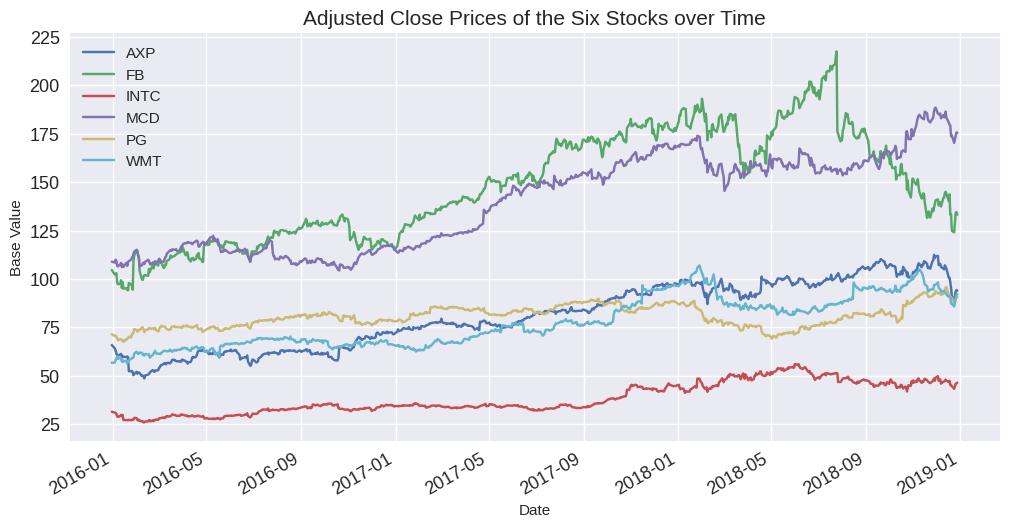

In [ ]:
# Visualize the adjusted close stock prices of the six stocks over time
adj_close.plot(figsize=(12,6), fontsize=13)
plt.legend(fontsize=11)
plt.title('Adjusted Close Prices of the Six Stocks over Time', fontsize=15)
plt.ylabel('Base Value')
plt.show()

### Visualize normalized closing stock prices

Comparing relative stock price performances over time periods can be tricky. They have different starting prices, meaning a direct comparison on a graph is difficult. __Rebasing__ them to the same starting point allows for quick comparison. Choosing a __base number__ such as __100.0__ is a common starting point.

In [ ]:
# Normalize the dataframe
norm = adj_close.div(adj_close.iloc[0]).mul(100)
norm.head()

,AXP,FB,INTC,MCD,PG,WMT
Date,,,,,,
2015-12-31,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2016-01-04,97.181859,97.668639,98.664755,99.526001,98.690331,100.261012
2016-01-05,95.686586,98.155933,98.200317,100.897243,99.005167,102.642742
2016-01-06,93.029395,98.385245,96.023252,100.220084,98.048091,103.670463
2016-01-07,92.191810,93.560094,92.423820,97.900822,97.191791,106.084838


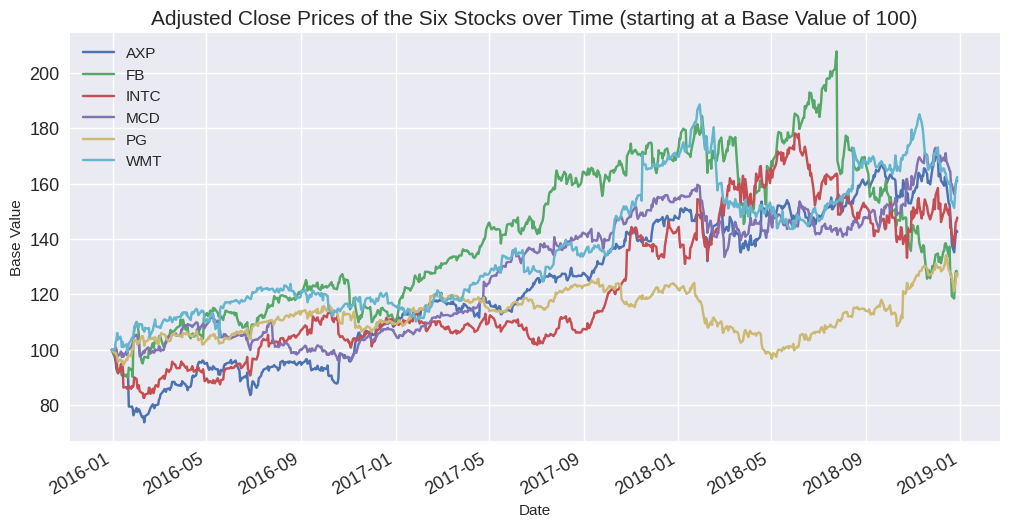

In [ ]:
# Replot the normalized dataframe
norm.plot(figsize=(12,6), fontsize=13)
plt.legend(fontsize=11)
plt.title('Adjusted Close Prices of the Six Stocks over Time (starting at a Base Value of 100)', fontsize=15)
plt.ylabel('Base Value')
plt.show()

### Monthly Returns


__Monthly Return__ is the period returns re-scaled to a period of 1 month. This allows investors to compare returns of different assets that they have owned for different lengths of time.

In [ ]:
# Compute monthly returns and store them in a new dataframe
monthly_returns = adj_close.pct_change(periods=1).mul(100)
monthly_returns.head()

,AXP,FB,INTC,MCD,PG,WMT
Date,,,,,,
2015-12-31,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-04,-2.818141,-2.331361,-1.335245,-0.473999,-1.309669,0.261012
2016-01-05,-1.538634,0.498926,-0.470723,1.377773,0.319015,2.375530
2016-01-06,-2.776973,0.233620,-2.216964,-0.671138,-0.966694,1.001260
2016-01-07,-0.900345,-4.904344,-3.748501,-2.314169,-0.873346,2.328894


In [ ]:
# Display this dataframe
monthly_returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2015-12-31 to 2018-12-28
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AXP     753 non-null    float64
 1   FB      753 non-null    float64
 2   INTC    753 non-null    float64
 3   MCD     753 non-null    float64
 4   PG      753 non-null    float64
 5   WMT     753 non-null    float64
dtypes: float64(6)
memory usage: 41.2 KB


### Annualized Mean Return

A mean return (also known as expected return) is the estimated profit or loss an investor expects to achieve from a portfolio of investments. With regards to the daily mean return, we have an average of about 252 trading days for the whole year. That is why we multiply the daily mean return by 252 to receive the annualized daily mean return.

In [ ]:
# Annualized Mean Return
ann_mean_Return = monthly_returns.mean()*252
ann_mean_Return

AXP     14.185042
FB      12.365649
INTC    16.323202
MCD     17.348488
PG       9.046814
WMT     18.349829
dtype: float64

### Annualized Standard Deviation

One of the most common methods of determining the risk an investment poses is standard deviation. Standard deviation helps determine market volatility or the spread of asset prices from their average price. To compute the annualized standard deviation of daily returns, we first calculate the daily standard deviation and multiply it by the square root of 252.

In [ ]:
# Annualized Standard Deviation
ann_std_Return = np.sqrt(monthly_returns.var())
ann_std_Return

AXP     1.344197
FB      1.834639
INTC    1.606492
MCD     1.049461
PG      0.957666
WMT     1.300403
dtype: float64

### Visualize risk/return of all six stocks in a (total) risk / return framework

In [ ]:
# Get rid of NaN values that occured
monthly_returns.dropna(inplace=True)
monthly_returns

,AXP,FB,INTC,MCD,PG,WMT
Date,,,,,,
2016-01-04,-2.818141,-2.331361,-1.335245,-0.473999,-1.309669,0.261012
2016-01-05,-1.538634,0.498926,-0.470723,1.377773,0.319015,2.375530
2016-01-06,-2.776973,0.233620,-2.216964,-0.671138,-0.966694,1.001260
2016-01-07,-0.900345,-4.904344,-3.748501,-2.314169,-0.873346,2.328894
2016-01-08,-0.328931,-0.602529,-1.036432,-0.155639,-1.567753,-2.291251
...,...,...,...,...,...,...
2018-12-21,-4.636103,-6.334331,-1.537119,0.270613,-0.010996,-0.171863
2018-12-24,-2.003722,-0.712284,-2.787691,-2.222219,-3.968343,-1.503497
2018-12-26,4.849155,8.157339,5.964668,2.202255,3.124994,5.348408


Next, we want to calculate the __annualize daily mean return__ and the __annulized standard deviation of daily returns__.

In [ ]:
summary = monthly_returns.describe().T.loc[:, ['mean', 'std']]
summary

,mean,std
AXP,0.056290,1.344197
FB,0.049070,1.834639
INTC,0.064775,1.606492
MCD,0.068843,1.049461
PG,0.035900,0.957666
WMT,0.072817,1.300403


In [ ]:
summary['mean'] = summary['mean']*252
summary['std'] = summary['std']*np.sqrt(252)

In [ ]:
summary

,mean,std
AXP,14.185042,21.338462
FB,12.365649,29.123990
INTC,16.323202,25.502272
MCD,17.348488,16.659683
PG,9.046814,15.202469
WMT,18.349829,20.643250


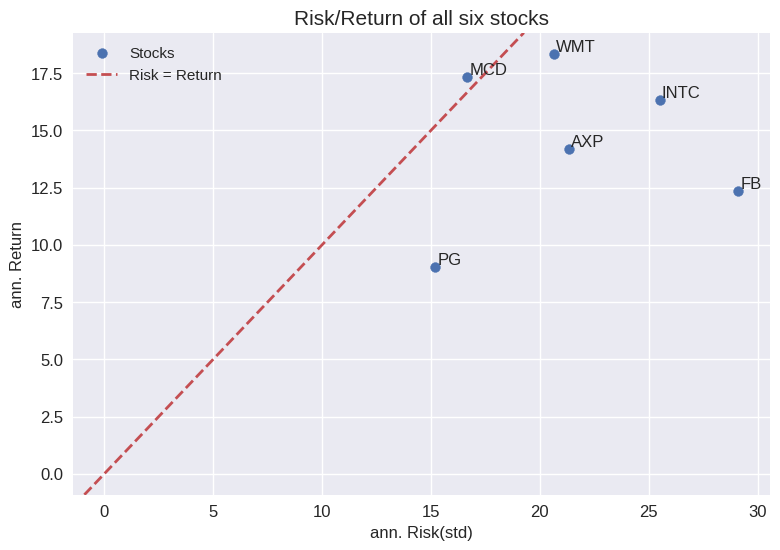

In [ ]:
# Plot the dataframe summary
summary.plot.scatter(x='std', y='mean', figsize=(9,6), s=50, label='Stocks')

# Annotate each stock with the company name.
for i in summary.index:
  plt.annotate(i, xy=(summary.loc[i,'std']+0.1,summary.loc[i,'mean']+0.1),size=12)

plt.title('Risk/Return of all six stocks', fontsize=15)
plt.xlabel('ann. Risk(std)', fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('ann. Return', fontsize=12)
plt.yticks(fontsize=12)

# Add an equilibrium line that represents an equal amount of risk and return
plt.axline((0, 0), (1, 1), linewidth=2, color='r',linestyle='dashed', label='Risk = Return')
plt.legend(loc='upper left', fontsize=11)

plt.show()

Every stock located to the right of the equilibrium line has a higher risk than return. Consequently, McDonald's (MCD) emerges as the best performing stock in terms of risk and return. Specifically, it is the only stock where the return exceeds the risk. Conversely, Facebook (FB) emerges as the worst performing stock in terms of risk and return.

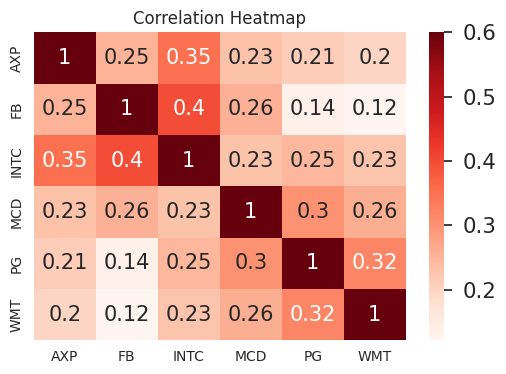

In [ ]:
# Plot the correlation between monthly returns to investigate stocks with the highest correlation
plt.figure(figsize=(6,4))
plt.title('Correlation Heatmap')
sns.set(font_scale=1.4)
sns.heatmap(monthly_returns.corr(), cmap='Reds', annot=True,  annot_kws={"size":15}, vmax=0.6)
plt.show()



As the heatmap shows, the strongest correlation exists between Facebook (FB) and Intel (INTC).


## Refrences:
https://www.fe.training/free-resources/asset-management/rebasing-stock-prices-to-100/

https://www.investopedia.com/ask/answers/021915/how-standard-deviation-used-determine-risk.asp

https://www.udemy.com/course/finance-data-with-python-and-pandas/